## Making a multi-class classifier from scratch* using batch gradient descent
*without Scikit-Learn

Here we will construct a softmax classifier from scratch (using numpy of course). In a nut-shell, the idea is we construct a logistic regression for each of the class types (here, flower types). These regression predict a score for each class. We then convert this score to a probability and pick the most probable type. There is no analytical solution, however, the parameter space is guarenteed to be convex, and therefore with an appropriate learning rate we should be able to converge on the solution with gradient descent. 

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# Types of flowers
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# Flower features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

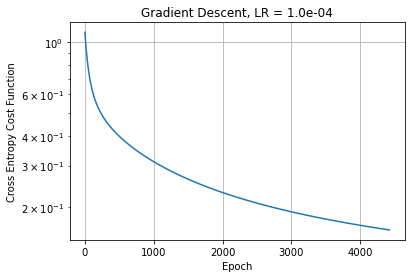

In [35]:
# Softmax Classifier with batch solver and early stopping without scikit-learn

# Dimensions
# i - instance (data)
# m - number of instances
# n - number of labels (e.g. 4 here)
# k - number of classes (e.g. 3 here)

# Linear Model: y = softmax( sigmoid( theta*x ) )

# Input/Outputs
# X - instances/data (n, m)
# y - labels (m, 1)
# theta - linear model for each class, (k, n)
# s - scores, (k, m)
# p - normalized probabiilty, (k, m)
# yh - predicted class, (m, 1)
# J - cost fxn, scalar
# dJ - gradient, (1, n)

epsilon = 1e-7

# Calcualtes the score for one class with it's model theta
def score(theta,x):
    s = np.dot(theta,x)
    return s

# Calculates probability, normalized across classes
def softmax_fxn(s):
    p = np.exp(s) / np.sum(np.exp(s), axis = 0)
    return p

# Picks the highest score
def softmax_classifier(p):
    yh = np.argmax(p,axis=0)
    return yh

# Calculates cost fxn
def cost_fxn(y,p):
    m = y.shape[0]
    #y = np.expand_dims(y,axis=1)
    J = -np.sum(y * np.log(p.transpose()+epsilon))/m
    return J

# Calculates the gradient of the cross entropy cost function
def cross_entropy_grad(p,y,X):
    pdy = (p - y.transpose())
    dJ = np.dot(pdy, X.transpose())
    return dJ

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()

# Load data
y1 = np.expand_dims((iris['target'] == 0).astype(np.int),axis=1)
y2 = np.expand_dims((iris['target'] == 1).astype(np.int),axis=1)
y3 = np.expand_dims((iris['target'] == 2).astype(np.int),axis=1)
y = np.concatenate((y1, y2, y3), axis = 1)
yp = iris['target']
X = iris.data.transpose()

# Learning rate
lr = .0001

# Max iterations
max_iter = 50000

# Tolerance, if percent change in cost fxn less than tol then stop early, 1e-4 appears a good value
tol = 1e-4

# Initialize
theta = np.ones((3,4)) # Simple model all ones
sJ = np.empty(max_iter) # Store cost fxn value for plotting later
sJ[:] = np.nan
dJde = 100 # Percent change in cost fxn
n = 0 # Counter

while (dJde > tol) | (n < 100):
    s = score(theta,X) # Calc Scores
    p = softmax_fxn(s) # Calc Probabilities    
    dJ = cross_entropy_grad(p,y,X) # Calc Gradient
    theta = theta - lr*dJ # Update model
    J = cost_fxn(y,p)  # Calc Cost fxn  
    sJ[n] = J  # Store 
    
    if n > 1: # How fast are we converging?
        dJde = abs(sJ[n-1] - sJ[n]) / sJ[n-1]

    if n >= (max_iter-1): # If too many iterations break
        print('Reached maximum interations')
        break
        
    n = n + 1  # Count
    
# Convert probabilities to classifications   
yh = softmax_classifier(p) 

plt.plot(sJ)
plt.ylabel('Cross Entropy Cost Function')
plt.xlabel('Epoch')
plt.grid()
plt.title('Gradient Descent, LR = {:1.1e}'.format(lr))
plt.yscale('log')
plt.show()

Interesting that at a relatively fast learning rate, there is some significant up/down in the cost function. At a lower learning rate we will converge more consistently (stabily), but typically slower. 

In [13]:
# Compare predictions and observations
Y = np.concatenate((np.expand_dims(yh,axis=1),np.expand_dims(yp,axis=1)),axis=1)
print(Y)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 2]
 [2 2]
 [1 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]

In [16]:
# How many correct/incorrect
y_correct = np.sum(yp==yh)
y_wrong = len(yp)-y_correct
print('{:d} are correct, {:d} are incorrect'.format(y_correct,y_wrong))

145 are correct, 5 are incorrect


I'll note that I did not create a test or validation set to see if we are overfitting because the exercise was mainly to develop the minimization algorigthm, and the dataset was small, just 150 instances.

In [17]:
# Let's look at our model
theta

array([[ 2.3805055 ,  3.98772036, -2.97243922, -0.88948278],
       [ 2.12642145,  1.17797527,  0.6774727 , -0.97314221],
       [-1.50692695, -2.16569564,  5.29496652,  4.86262499]])

In [31]:
# Let's compare to scikit's version
X = iris['data']
y = iris['target']

from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10,max_iter=1000)
softmax_reg.fit(X,y)
yps = softmax_reg.predict(X)
Y = np.concatenate((np.expand_dims(yh,axis=1),np.expand_dims(yp,axis=1),np.expand_dims(yps,axis=1)),axis=1)
print(Y)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [2 1 2]
 [1 1 1]
 [2 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [2 1 2]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 

In [32]:
softmax_reg.coef_

array([[-0.38743634,  2.03198295, -4.28122671, -2.05974991],
       [ 1.03757883, -0.04002036, -0.46855926, -2.28401404],
       [-0.65014249, -1.99196259,  4.74978597,  4.34376395]])

In [33]:
y_correct = np.sum(yps==yh)
y_wrong = len(yp)-y_correct
print('{:d} are correct, {:d} are incorrect'.format(y_correct,y_wrong))

146 are correct, 4 are incorrect
